<a href="https://colab.research.google.com/github/remyaP12/labcycle/blob/main/5_3labcycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5.Apply histogram equalization on an image and display the resultant image.

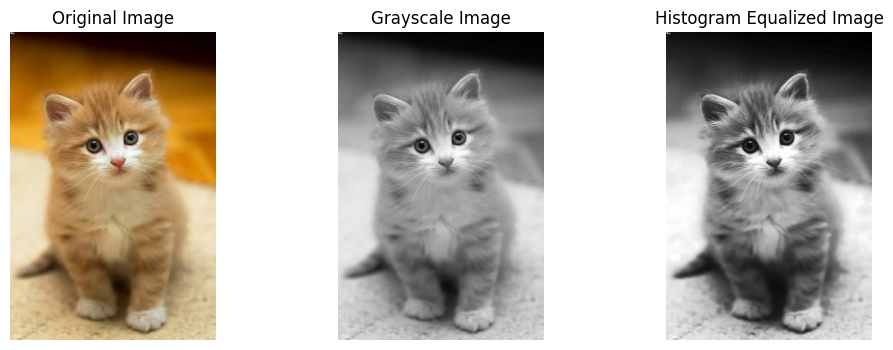

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read image
img = cv2.imread("/content/cat.jpg")

# Step 2: Convert to grayscale manually
h, w, _ = img.shape
gray = np.zeros((h, w), dtype=np.uint8)

for i in range(h):
    for j in range(w):
        B, G, R = img[i, j]
        gray[i, j] = int(0.299*R + 0.587*G + 0.114*B)

# Step 3: Compute histogram
hist = np.zeros(256)
for i in range(h):
    for j in range(w):
        hist[gray[i, j]] += 1

# Step 4: Normalize histogram (PDF)
pdf = hist / (h * w)

# Step 5: Compute cumulative distribution function (CDF)
cdf = np.zeros(256)
cdf[0] = pdf[0]

for i in range(1, 256):
    cdf[i] = cdf[i-1] + pdf[i]

# Step 6: Create equalized image
equalized = np.zeros((h, w), dtype=np.uint8)

for i in range(h):
    for j in range(w):
        equalized[i, j] = int(cdf[gray[i, j]] * 255)

# Step 7: Display results
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Histogram Equalized Image")
plt.imshow(equalized, cmap='gray')
plt.axis("off")

plt.show()
